MS Teams data

In [29]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import plotly.express as px
%matplotlib inline

In [30]:
#Read Data sets
dfr=pd.read_csv('Relationships.csv')
dfp=pd.read_csv('People.csv')

In [32]:
# contract the users and groups
dfr['From User'] = dfr['From User'].str.slice(0,8)
dfr['To User'] = dfr['To User'].str.slice(0,8)
dfr['Group ID'] = dfr['Group ID'].str.slice(0,8)

In [51]:
# Drop the empty To Users
dfr = dfr.dropna()

In [52]:
#From User to User
dfr3=dfr.groupby ('From User')['To User'].count().sort_values(ascending=False)
dfr3

From User
bc9ef675    427
26679fb2    424
47718ff7    287
ffeb420b    140
1bf30d7c    138
b03a081e     83
47662dd8     59
18d50529     45
d3572eaa     33
8dd45763     18
1ab92d7c     16
0f70271d     13
d9c69ba9     13
d67b8534     11
18880d3c     11
d1f34547      4
d9c6dc84      4
3b053fd3      3
4d414449      2
f233fdf9      2
a13f1903      2
7b7fdea2      2
Name: To User, dtype: int64

In [53]:
#use the networkx library to get a graph
import networkx as nx

In [54]:
Gu = nx.from_pandas_edgelist(dfr, source='From User', target='To User') 

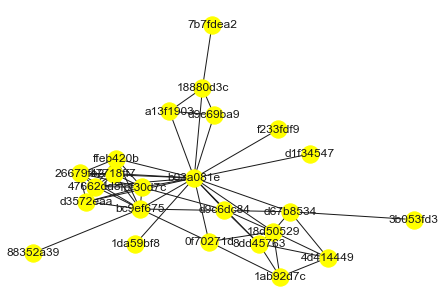

In [57]:

nx.draw(Gu,with_labels=True,node_color='yellow')


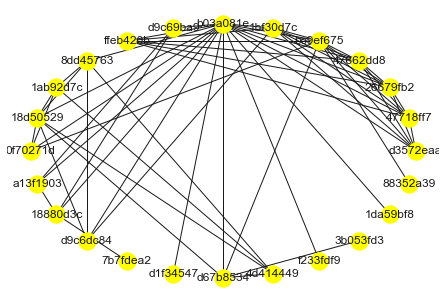

In [58]:

nx.draw(Gu,
        with_labels=True,
        node_color='yellow',
        pos = nx.circular_layout(Gu))



In [59]:
	dfbc = pd.DataFrame(dict(
    BETWEENNESS_CENTRALITY = nx.betweenness_centrality(Gu,weight=None,
                                             normalized=False),
  ))
dfbc

,BETWEENNESS_CENTRALITY
0f70271d,8.166667
18880d3c,22.000000
18d50529,14.166667
1ab92d7c,0.833333
1bf30d7c,3.666667
1da59bf8,0.000000
26679fb2,0.166667
3b053fd3,0.000000
47662dd8,0.166667
47718ff7,0.166667


In [60]:
import nxviz as nxv

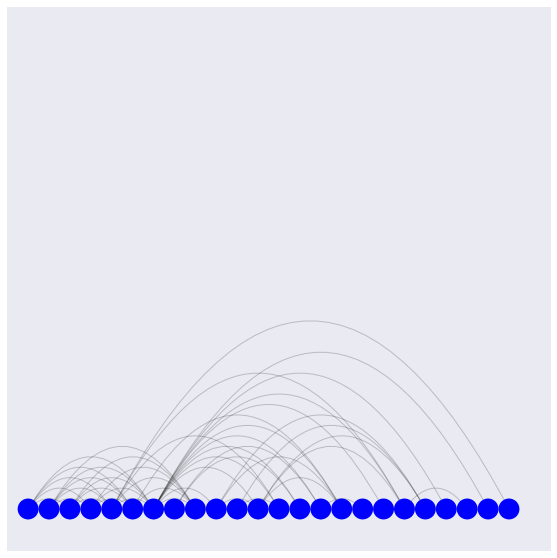

In [61]:
#experimental ARC plot
deg_cen = nx.degree_centrality(Gu)
a = nxv.ArcPlot(Gu, node_labels=True,
                figsize=(10,10))
a.draw()

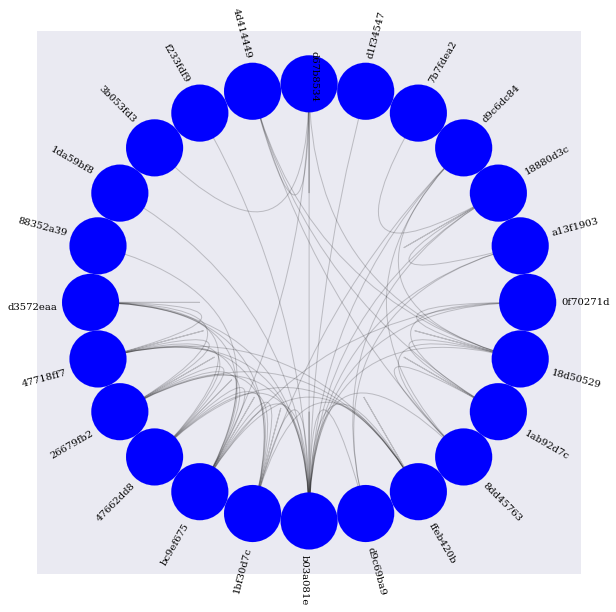

In [44]:

#Experimental Circos plot
c = nxv.CircosPlot(Gu,
                   node_labels=True, node_label_layout='rotation',
                   group_label_offset=12,
                   figsize=(10,10))
c.draw()

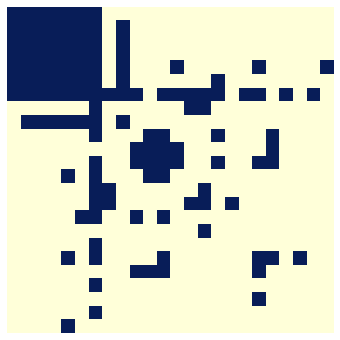

In [66]:
from nxviz import MatrixPlot

m = MatrixPlot(Gu)
m.draw()


In [63]:
#Extract the days and hours
dfr[["datetime"]] = dfr[["Date"]].apply(pd.to_datetime)
#collect weekdays from datetime
dfr['day_of_week'] = dfr['datetime'].dt.day_name()
#collect hours from datetime
dfr['hour'] = dfr['datetime'].dt.strftime('%H').astype(int)


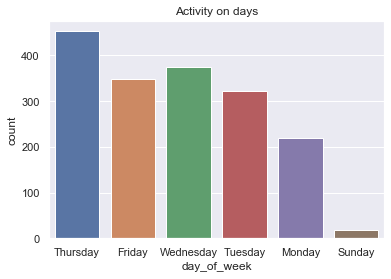

In [64]:
ax = sns.countplot(x="day_of_week", data=dfr).set(title = 'Activity on days');

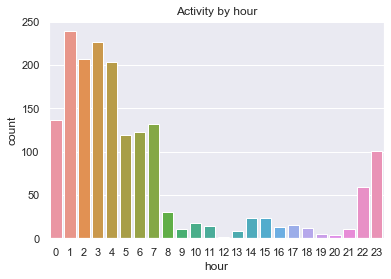

In [65]:
ax = sns.countplot(x="hour", data=dfr).set(title = 'Activity by hour');
#seems the hours require an offset

In [69]:
	!jupyter nbconvert --to html MS-Teams.ipynb

[NbConvertApp] Converting notebook MS-Teams.ipynb to html
[NbConvertApp] Writing 726068 bytes to MS-Teams.html
